# Data Science: M10 Practical Challenge
Naïve Bayes Sentiment Analysis 
Jacob Goodman & Alan Leidner

https://yu.instructure.com/courses/50398/assignments/191938?module_item_id=705073


# Introduction:  

The data set we will be working with is sourced from this site: http://www.cs.cornell.edu/people/pabo/movie-review-data/. Specifically, we will be working with the polarity dataset v2.0, which is comprised of 1000 positive and 1000 negative movie reviews. Each movie review is in the form of free-form text captured from website postings. To complete this assignment, we will need to make use of pre-processing techniques to prepare the content of the reviews for use within a classification model (e.g., strip out punctuation, stop words, etc.). We will then construct a Naïve Bayes sentiment classifier for purposes of gauging the sentiment of movie reviews. Finally, we will test our classifier against a previously unseen review.

# Data Preparation 

**steps**
1. Load documents 
2. Create Tokens
3. Create Dictionary 
4. Create Bag of Words Vector

In [1]:
#function sourced from https://mylearningsinaiml.wordpress.com/tag/movie-review-data-sentiment-analysis/
from os import listdir
import numpy as np
 
#define function to load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [2]:
#create file path for "local" documents
import os 
pos_url = os.path.join("txt_sentoken","pos")
neg_url = os.path.join("txt_sentoken","neg")

neg_files = os.listdir(neg_url)
pos_files = os.listdir(pos_url)

#load documents into lists
negs = []
for file in neg_files:
    if file.endswith('.txt'):
        url = os.path.join(neg_url,file)
        negs.append(load_doc(url))

poses = []
for file in pos_files:
    if file.endswith('.txt'):
        url = os.path.join(pos_url,file)
        poses.append(load_doc(url))

In [37]:
import nltk
nltk.download('stopwords')
#define a function to turn a doc into clean tokens
def clean_doc(doc):
    """
        this function takes in a string of text and converts it into an array of tokens
        it takes the following steps:
        1. splits the string by white space
        2. removes the following  punctuation, non-numerics, stopwords, and words less than 1 token
        3. stems the words using the snowball stemmer
        4. returns an array of cleaned tokens
    """

    import nltk
    from nltk.corpus import stopwords
    import re
    import string
    from nltk.stem import SnowballStemmer

    snowball = SnowballStemmer(language='english')# INTIALIZING STEMMER


    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile(f'[{re.escape(string.punctuation)}]')
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    #stems tokens to prevent plurals and other morphological affixations
    tokens = [snowball.stem(word) for word in tokens if len(word) > 1]
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
#clean documents
clean_negs =[]
clean_pos =[]
for neg in negs:
    clean = clean_doc(neg)
    clean_negs.append(clean)
for pos in poses:
    clean = clean_doc(pos)
    clean_pos.append(clean)

In [6]:
#create two gensim dictionaries that encompasses the "cleaned" words contained in the movie reviews both positive and negative
from gensim.corpora import Dictionary

neg_dct = Dictionary(clean_negs)
pos_dct = Dictionary(clean_pos)
#dct.add_documents(clean_pos)

# Frequency Distribution Plots
Here we will examine the most frequently occurring words in each dictionary

In [7]:
# get top 30 words in negative review corpus
import pandas as pd
neg_df = pd.DataFrame(neg_dct.cfs.items(),columns=['word_id','count'])
neg_df['word'] = neg_df.word_id.apply(lambda x: neg_dct.get(x))
neg_df.sort_values('count',ascending=False)[:30]

,word_id,count,word
5,59,4963,film
40,101,3731,movi
33,111,2715,one
163,90,2050,like
235,205,1802,charact
31,63,1684,get
223,282,1502,make
173,49,1404,even
247,345,1377,time
18,135,1288,scene


In [8]:
# get top 30 words in positive review corpus
pos_df = pd.DataFrame(pos_dct.cfs.items(),columns=['word_id','count'])
pos_df['word'] = pos_df.word_id.apply(lambda x: pos_dct.get(x))
pos_df.sort_values('count',ascending=False)[:30]

,word_id,count,word
238,119,6144,film
50,212,3126,movi
4,229,3044,one
614,646,2053,charact
165,183,1947,like
13,195,1650,make
290,334,1525,time
11,131,1505,get
298,291,1350,scene
318,319,1347,stori


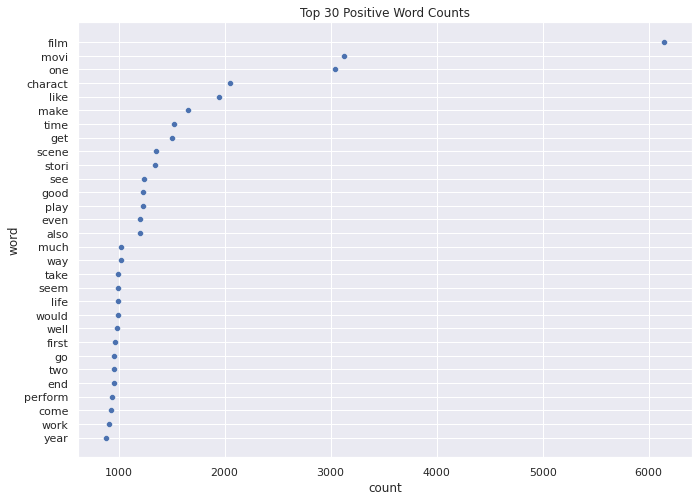

In [9]:
#create frequency visualization of the 30 most frequent positive words
import seaborn as sns
pos_df.sort_values(by=['count'],ascending=False,inplace=True)
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(data=pos_df[:30], x="count", y='word').set_title('Top 30 Positive Word Counts')

The distribution of the top 30 words appears to be logarithmic. The words that appear over 1000 times (the number of reviews) appear to be generic to moves except for "good" and "like." I would imagine many of these words would appear in the top 30 negative words as well.

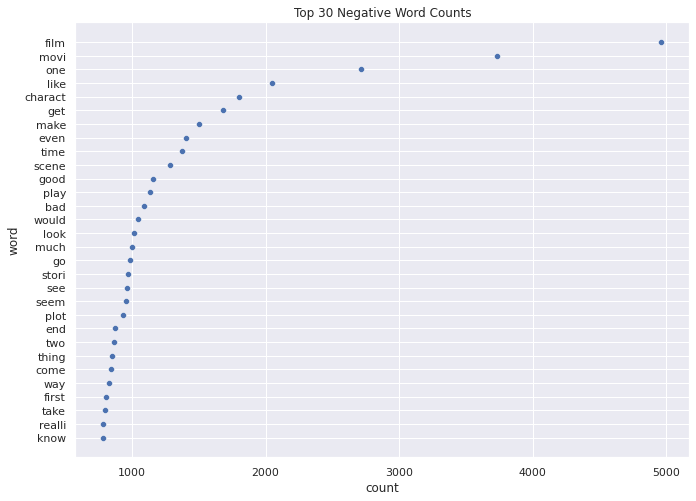

In [10]:
#create frequency visualization of the 30 most frequent negative words
neg_df.sort_values(by=['count'],ascending=False,inplace=True)
sns.scatterplot(data=neg_df[:30], x="count", y='word').set_title('Top 30 Negative Word Counts')

This distribution also seems logarithmic. There are some unique "negative" words that appear like "bad," but the word "good" appears here too. We would imagine that in the negative review it would be preceded by a negation such as "not good," though that is beyond the scope of this notebook. Most of the top 30 positive words appear here too. We think it would be useful to compare these distributions.

In [11]:
#merge dataframes on the words to visualize the comparisons
comb_df = neg_df.merge(pos_df, left_on='word', right_on='word',suffixes=('_neg','_pos'))
comb_df.head()

,word_id_neg,count_neg,word,word_id_pos,count_pos
0,59,4963,film,119,6144
1,101,3731,movi,212,3126
2,111,2715,one,229,3044
3,90,2050,like,183,1947
4,205,1802,charact,646,2053


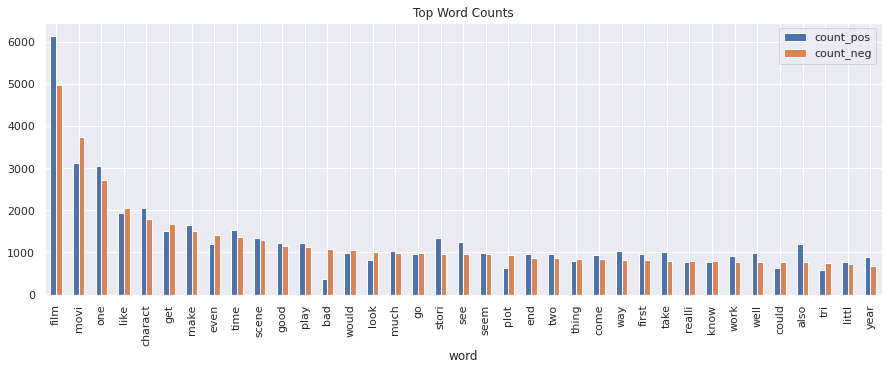

In [12]:
#create bar plot of the most common words to compare the frequency in positive and negative reviews
data=comb_df[:37].plot.bar(x='word', y=['count_pos','count_neg'], figsize=(15,5), grid=True).set_title('Top Word Counts')#sliced at 37 to include the top 30 words from each set

Our individual plots hinted to us that the most frequent words would appear in both negative and positive reviews, despite the removal of stopwords and stemming. However, the similarity of the top words in both categories of review is striking. There are some differences; negative reviews are more likely to use the term "movie" and positive reviews will call it a "film." "Bad" rarely appears in positive reviews. "Stori," "also," and "see" also seem to occur more frequently in positive reviews. On the whole, we would not be confident in our model's accuracy if we trained it only on the most frequent words. The less frequent words may have a larger impact.

# Naïve Bayes Model Training

We will now finish preparing the data so it is suitable for modeling. These steps include;
1. Create a master dictionary that contains all positive and negative reviews
2. Feed our reviews into the dictionary to create our corpus
3. Convert the corpus to dense matrix
4. Create a "y" column of labels to indicate positive and negative classification
5. Split the data into test and train sets
6. Initialize and train the models
    1) Sklearn Model
    2) Nltk Model
7. Evaluate the respective training models

In [13]:
#create master dictionaru
master_dic =  Dictionary(clean_pos)
master_dic.add_documents(clean_negs)

In [14]:
#feed our reviews into the dictionary to create our corpus
docs = []
for doc in clean_pos:
    test = master_dic.doc2bow(doc)
    docs.append((test))
for doc in clean_negs:
    test = master_dic.doc2bow(doc)
    docs.append((test))

In [15]:
#convert corpus to matrix to enable model training
from gensim.matutils import corpus2dense
data = corpus2dense(docs,len(master_dic))
data = data.T

In [16]:
#adding classification
y = np.ones((1000, 1))
y = np.append(y,np.zeros((1000,1)))
y.shape

(2000,)

## Complete term document matrix

In [17]:
df = pd.DataFrame(data,dtype=np.int8)#changing datatype to free up memory
df['target'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30701,30702,30703,30704,30705,30706,30707,30708,30709,target
0,2,1,1,1,1,1,3,1,1,1,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,1,0,3,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,1.0
3,0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,1,2,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0


## Split Data

In [18]:
## test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.25 , random_state=42, stratify = y)
X_train.shape

(1500, 30710)

## Model Building

### sklearn implementation

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [20]:
# accuracy 
model.score(X_train,y_train)

0.9733333333333334

In [21]:
from sklearn.metrics import classification_report
#classifcation report 
y_pred = model.predict(X_train)

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       750
         1.0       0.98      0.97      0.97       750

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



This looks like a very solid model; all scores are approximately 97%. The model doesn't seem over-fit or under-fit, which isn't surprising on the training data alone.

#### Feature Importance

In [22]:
log = pd.DataFrame(model.feature_log_prob_.T)
log.reset_index(inplace=True)
log['index'] = log['index'].apply(lambda x: master_dic.get(x))

In [23]:
log.head()
log.sort_values(1,ascending=True)[:30]

,index,0,1
30709,superdemon,-11.849183,-12.633977
23722,choosen,-11.849183,-12.633977
23721,arguement,-11.849183,-12.633977
23720,uhaul,-11.443718,-12.633977
23719,sixastronaut,-11.849183,-12.633977
23718,productplac,-11.849183,-12.633977
23717,exsecretari,-11.849183,-12.633977
23716,powerhous,-11.443718,-12.633977
23715,phrasingtoo,-11.849183,-12.633977
23714,movieyou,-11.849183,-12.633977


It looks like a lot of the infrequent words that don't appear to be common are the most important in this model. We will now build a Naive Bayes model with the nltk classifier to see if it performs better, or uses features that are more understandable.

### Nltk Implementation
1. Format Data:
    1. ({documentdictionary},label)
2. Train Model

In [24]:
#load documents in a format the nltk naive bayes classifier can use
docs_pos = []
docs_negs = []
for doc in clean_pos:
    test = master_dic.doc2bow(doc)
    test = {master_dic.get(x):y for x,y in test}
    example = (test,'pos')
    docs_pos.append(example)
for doc in clean_negs:
    test = master_dic.doc2bow(doc)
    test = {master_dic.get(x):y for x,y in test}
    example = (test,'neg')
    docs_negs.append(example)

In [25]:
#split data into training and testing sets
import random
#trainign set
nltk_train = docs_pos[:750]+docs_negs[:750]  #first 750 entries of both pos and neg

#testing set
nltk_test = docs_pos[750:]+docs_negs[750:]#last 250 entries


# shuffling train for reasons
random.seed(42)
random.shuffle(nltk_train)

In [26]:
#initialize classifier
from nltk import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(nltk_train)

In [27]:
from nltk import classify

accuracy = classify.accuracy(classifier, nltk_train)
print (accuracy) 

0.9913333333333333


In [28]:
#classifcation report on training data

nltk_y = [n[1] for n in nltk_train]
nltk_sample = [n[0] for n in nltk_train]

nltk_pred = classifier.classify_many(nltk_sample)

print(classification_report(nltk_y,nltk_pred))

              precision    recall  f1-score   support

         neg       1.00      0.98      0.99       750
         pos       0.98      1.00      0.99       750

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



The ntlk classifier has higher scores than the sklearn library across the board. Once again, these are the scores of the training data. We will now look at the most important features.

In [29]:
classifier.most_informative_features(30)

[('murphi', 1),
 ('outstand', 1),
 ('misfir', 1),
 ('suppos', 3),
 ('onenot', 1),
 ('deft', 1),
 ('gothic', 1),
 ('stupid', 2),
 ('anger', 1),
 ('plod', 1),
 ('porn', 1),
 ('car', 3),
 ('winter', 1),
 ('aw', 2),
 ('carnag', 1),
 ('textur', 1),
 ('themat', 1),
 ('incompet', 1),
 ('offbeat', 1),
 ('finest', 1),
 ('clever', 2),
 ('delight', 2),
 ('terribl', 2),
 ('annual', 1),
 ('buy', 2),
 ('dark', 3),
 ('darker', 1),
 ('incoher', 1),
 ('trim', 1),
 ('ugh', 1)]

These seem less "unique" than the features of the sklearn classifier. We will now see which performs better on the testing data.

# Model Testing
We will now apply the testing subset to our models and discuss our results.

In [30]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       250
         1.0       0.81      0.77      0.79       250

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500



In [31]:
nltk_y = [n[1] for n in nltk_test]
nltk_sample = [n[0] for n in nltk_test]

nltk_pred = classifier.classify_many(nltk_sample)

print(classification_report(nltk_y,nltk_pred))

              precision    recall  f1-score   support

         neg       0.97      0.42      0.58       250
         pos       0.63      0.99      0.77       250

    accuracy                           0.70       500
   macro avg       0.80      0.70      0.68       500
weighted avg       0.80      0.70      0.68       500



The testing model scores are far from the .97 accuracy scores of the training models, but that is not surprising. The sklearn model has a more balanced precision and recall score than the nltk library. The accuracy of the sklearn model is also 9% better than the nltk model. Even though the nltk classifier has some higher precision and recall scores, the sklearn model's f1-score is better for both classes. For those reasons, we prefer the sklearn model.

## New Review
 We will now apply our model to a previously unseen movie review. How well did your model perform on that review?  

Steps:
1. Load data 
2. Transform data
    1. Tokenize
    2. Bag-of-words format
    3. Format sklearn dense matrix for the model
3. Predict review class

In [32]:
#1. load data
review =  """There were some things I didn't like about this film. Here's what I remember most strongly: a man in an ingeniously
            fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with a less than believable 
            laugh; an ex-drug addict martian with tics; child actors who recite their lines very slowly and carefully;
            a newspaper headline declaring that Santa has been "kidnapped", and a giant robot. The least appealing acting job in the 
            film must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. They seemed to display an exaggerated amount of fear. 
            Perhaps this was the preferred acting style in the 1960's??"""

In [33]:
#2.1 tokenize
review_token = clean_doc(review)

#2.2 bag of words
review_bag = master_dic.doc2bow(review_token)

#2.3.1 sklearn
dense = corpus2dense( [review_bag],
              len(master_dic)
            )
dense = dense.T

In [34]:
#3. predict review class with sklearn model
model.predict_proba(dense)

# Conclusions 

Our sklearn model correctly predicts that the "new" review is negative, with a .85 probability. This aligns with the 79% accuracy score we found for the model. We don't see any of the most informative features from our training model in the text of the review and assume some of the less prominent features had a larger effect in aggregate. We are confident in the 80% accuracy of our predictive model.